<a href="https://colab.research.google.com/github/LanesG/colab/blob/master/CNN_Dog_Races.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importieren der Libraries

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Input, \
  Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [0]:
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.\nGo to Runtime > Change runtime and select a GPU hardware accelerator.")

In [3]:
!pip install --upgrade deeplearning2020
from deeplearning2020 import helpers

Requirement already up-to-date: deeplearning2020 in /usr/local/lib/python3.6/dist-packages (0.4.21)


# Die Daten
## Laden der Daten

In [4]:
from deeplearning2020.datasets import ImageWoof

train_data, test_data, classes = ImageWoof.load_data()

/root/.keras/datasets/imagewoof2-320/train
Loaded 9025 images
/root/.keras/datasets/imagewoof2-320/val
Loaded 3929 images


## Informationen über die Datensätze anzeigen
Die Bildpunkte sind als Floats zwischen 0 und 1 gespeichert.  
Die Labels der Daten liegen in sparse Form vor.

In [5]:
print("Trainingsdaten")
print(train_data)

print("Testdaten")
print(test_data)

Trainingsdaten
<ParallelMapDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
Testdaten
<ParallelMapDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>


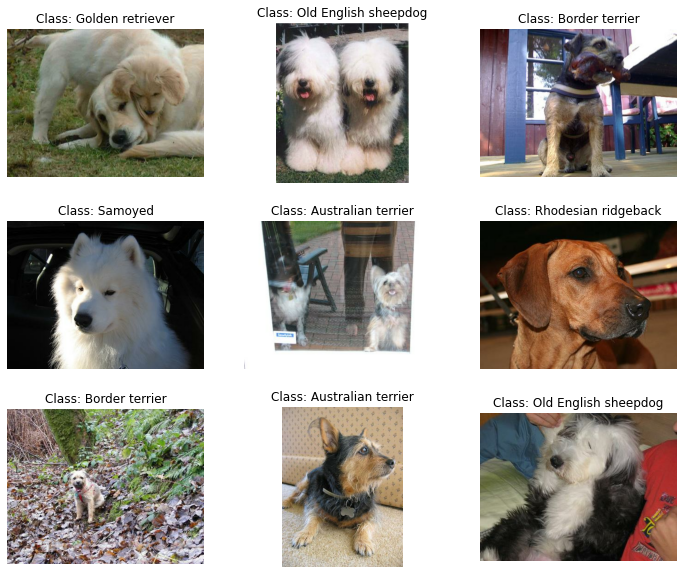

In [6]:
helpers.plot_images(train_data.take(9), classes)

## Preprocessing der Daten
Um mit den Bilddaten arbeiten zu können, müssen diese eine einheitliche Größe haben. Dafür steht die Funktion `preprocess` bereit, die alle Bilder in die vorgegebene Größe umwandelt.

In [0]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [300, 300])
    return resized_image, label

Anwendung der `preprocess` Funktion auf alle Daten.  
`.batch` bereitet den nächsten Batch mit festeglegter Größe vor.  
`.prefetch` lädt den nächsten Batch schon in den Speicher.

In [8]:
# Festlegung der Batch Größe für die Datenvorbereitung
batch_size = 32 

# Durchmischen der Trainingsdaten, dass nicht mit sortierten Bildern trainiert wird 

train_data = train_data.shuffle(1000) 

print('shape des Trainigsdatensatzes vor dem preprocessing: ', train_data)

train_data = train_data.map(preprocess) \
  .batch(batch_size).prefetch(1)          
test_data = test_data.map(preprocess) \
  .batch(batch_size).prefetch(1)

print('shape des Traingingsdatensatzes nach dem preprocessing: ', train_data)

shape des Trainigsdatensatzes vor dem preprocessing:  <ShuffleDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
shape des Traingingsdatensatzes nach dem preprocessing:  <PrefetchDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>


# Das Netz

## Hyperparameter

In [0]:
dense_neurons=1000
n_filters=512
activation='elu'

## Die Layer

In [0]:
# Inputgröße muss 300x300 Pixel mit 3 RGB Farben betragen
input_layer = Input(shape=(300, 300, 3))

# Convolutional Neural Network
# 6 Convolutional Layers mit jeweils einer Max Pooling Layer
model = Conv2D(
    filters=64,
    kernel_size=(7,7),
    strides=(2,2),
    activation=activation,
    padding='same'
)(input_layer)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 256,
    kernel_size=(3,3),
    activation=activation,
    padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters,
    kernel_size=(3,3),
    activation=activation,
    padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters,
    kernel_size=(3,3),
    activation=activation,
    padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters,
    kernel_size=(3,3),
    activation=activation,
    padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
  filters = n_filters,
  kernel_size=(3,3),
  activation=activation,
  padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

# Fully-Connected-Classifier
model = Flatten()(model)
model = Dense(
  dense_neurons,
  activation=activation
)(model)

model = Dense(
  dense_neurons / 2,
  activation='tanh'
)(model)

# Output Layer
output = Dense(10, activation='softmax')(model)

CNN_model = Model(input_layer, output)

In [74]:
CNN_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 150, 150, 64)      9472      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 75, 75, 256)       147712    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 37, 37, 256)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 37, 37, 512)       1180160   
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 18, 18, 512)       0   

## Kompilieren des Netzes

In [0]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
CNN_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

## Trainieren des Netzes

In [76]:
history = CNN_model.fit(
    train_data,
    epochs=2,
    validation_data=test_data
)

Epoch 1/2
283/283 [==============================] - 33s 116ms/step - loss: 13.4492 - accuracy: 0.1052 - val_loss: 13.4844 - val_accuracy: 0.1021
Epoch 2/2
283/283 [==============================] - 33s 115ms/step - loss: 13.4492 - accuracy: 0.1052 - val_loss: 13.4798 - val_accuracy: 0.1021


## Evaluieren des Netzes

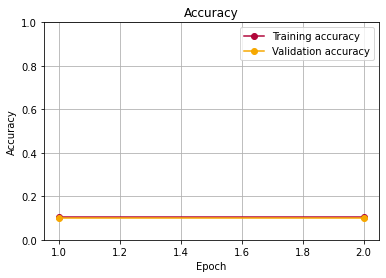

In [77]:
helpers.plot_history('Accuracy', history, 0)

In [78]:
eval_loss, eval_accuracy = CNN_model.evaluate(test_data)
print("Model accuracy: %.2f" % eval_accuracy)
print(eval_loss)

123/123 [==============================] - 8s 67ms/step - loss: 13.4856 - accuracy: 0.1021
Model accuracy: 0.10
13.485577583312988
